# Analysis of FordGo Bike trends

## (January 2018 - April 2019)

## Inroduction


FordGo bike now Bay Wheels is a regional public bicycle sharing system in the San Francisco Bay Area, California operated by Motivate (a company based in New York City that operates bicycle sharing systems in the United States), in a partnership with the Metropolitan Transportation Commission and the Bay Area Air Quality Management District. Beginning operation in August 2013 as Bay Area Bike Share, the Bay Wheels system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was subsequently renamed to Bay Wheels in June 2019. The system is expected to expand to 7,000 bicycles around 540 stations in San Francisco, Oakland, Berkeley, Emeryville, and San Jose. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States.

As of January 2018, the system had seen nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers.

## Data Wrangling


The data set contains ride of each user over a time period of January 2019 to April 2019.

In [1]:
# importing necessary libraries
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import radians, sin, cos, acos
import requests
import zipfile

%matplotlib inline

### Data Collection
We gather the data. The code below will download, unzip and merge the data together to a final *.csv file from January 2018 to April 2019.

In [2]:
#defining filenames to be download
year_data = [x for x in range(201801, 201813)] + [x for x in range(201901, 201905)]

for year in year_data:
    
    url = f"https://s3.amazonaws.com/fordgobike-data/{year}-fordgobike-tripdata.csv.zip"
    response = requests.get(url)
   
    #saving file
    with open(f"./Data/{year}-fordgobike-tripdata.csv.zip", mode = "wb") as file:
        file.write(response.content)

In [3]:
#defining file names

files = [x for x in os.walk("./Data/")][0][2]

#loop over file names
for x in files:
    if ".zip" in x:
        with zipfile.ZipFile(f"./Data/{x}",'r') as zip_ref:
            zip_ref.extractall("./Data/")

In [4]:
#saving each file to a single csv

path = r'./Data/'
file1 = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(a) for a in file1), ignore_index = True)

df.to_csv('fordgo_master.csv', index = False)

In [5]:
#checking data

df = pd.read_csv('fordgo_master.csv')
df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734625 entries, 0 to 2734624
Data columns (total 16 columns):
duration_sec               2734625 non-null int64
start_time                 2734625 non-null object
end_time                   2734625 non-null object
start_station_id           2722124 non-null float64
start_station_name         2722124 non-null object
start_station_latitude     2734625 non-null float64
start_station_longitude    2734625 non-null float64
end_station_id             2722124 non-null float64
end_station_name           2722124 non-null object
end_station_latitude       2734625 non-null float64
end_station_longitude      2734625 non-null float64
bike_id                    2734625 non-null int64
user_type                  2734625 non-null object
member_birth_year          2583000 non-null float64
member_gender              2583354 non-null object
bike_share_for_all_trip    2734625 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 333.8+ MB


In [6]:
#sampling the data for checking for the required changes to be made.

df.sample(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
752252,237,2018-06-11 20:14:40.0170,2018-06-11 20:18:37.1700,176.0,MacArthur BART Station,37.828410,-122.266315,211.0,Broadway at 40th St,37.827757,-122.256716,570,Subscriber,1991.0,Male,No
2165042,273,2019-02-12 19:37:43.8080,2019-02-12 19:42:17.7540,157.0,65th St at Hollis St,37.846784,-122.291376,270.0,Ninth St at Heinz Ave,37.853489,-122.289415,5094,Subscriber,1959.0,Male,No
834776,683,2018-07-29 16:52:16.7180,2018-07-29 17:03:40.6570,88.0,11th St at Bryant St,37.770030,-122.411726,50.0,2nd St at Townsend St,37.780526,-122.390288,2027,Subscriber,1965.0,Male,No
1868341,2835,2019-01-31 14:47:14.4930,2019-01-31 15:34:30.1810,198.0,Snow Park,37.807813,-122.264496,194.0,Lakeshore Ave at Trestle Glen Rd,37.811081,-122.243268,4754,Subscriber,1992.0,Female,Yes
1610254,660,2018-11-28 16:19:07.5410,2018-11-28 16:30:08.3430,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,213.0,32nd St at Adeline St,37.823847,-122.281193,49,Subscriber,1987.0,Other,No
1719651,703,2018-11-02 17:48:15.9540,2018-11-02 17:59:59.3660,81.0,Berry St at 4th St,37.775880,-122.393170,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,1814,Subscriber,1979.0,Female,No
1937637,302,2019-01-23 08:31:52.1280,2019-01-23 08:36:54.4740,5.0,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,64.0,5th St at Brannan St,37.776754,-122.399018,4802,Subscriber,1964.0,Male,No
974755,406,2018-07-09 08:21:00.1790,2018-07-09 08:27:46.7770,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,50.0,2nd St at Townsend St,37.780526,-122.390288,3160,Subscriber,1975.0,Male,No
2283229,402,2019-03-26 20:08:39.0270,2019-03-26 20:15:21.1820,90.0,Townsend St at 7th St,37.771058,-122.402717,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,4832,Subscriber,1984.0,Male,No
1194526,289,2018-08-03 09:10:03.8160,2018-08-03 09:14:53.1640,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,2651,Subscriber,1996.0,Male,No


In [7]:
#checking for in-depth description for the data 

df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,2.734625e+06,2.722124e+06,2.734625e+06,2.734625e+06,2.722124e+06,2.734625e+06,2.734625e+06,2.734625e+06,2.583000e+06
mean,8.316217e+02,1.258610e+02,3.776825e+01,-1.223510e+02,1.243537e+02,3.776815e+01,-1.223497e+02,2.929797e+03,1.983616e+03
std,2.232948e+03,1.052229e+02,1.057828e-01,1.684623e-01,1.052322e+02,1.415466e-01,3.483115e-01,1.762695e+03,1.035014e+01
min,6.100000e+01,3.000000e+00,0.000000e+00,-1.224737e+02,3.000000e+00,0.000000e+00,-1.224737e+02,1.100000e+01,1.878000e+03
25%,3.460000e+02,3.700000e+01,3.777041e+01,-1.224117e+02,3.300000e+01,3.777106e+01,-1.224113e+02,1.501000e+03,1.979000e+03
50%,5.500000e+02,9.200000e+01,3.778107e+01,-1.223974e+02,9.000000e+01,3.778107e+01,-1.223971e+02,2.835000e+03,1.986000e+03
75%,8.610000e+02,1.960000e+02,3.779728e+01,-1.222894e+02,1.960000e+02,3.779728e+01,-1.222902e+02,4.225000e+03,1.991000e+03
max,8.636600e+04,4.200000e+02,4.551000e+01,0.000000e+00,4.200000e+02,4.551000e+01,0.000000e+00,7.108000e+03,2.001000e+03


In [8]:
#checking for duplicate values

df.duplicated().sum()

0

In [9]:
#checking for NaN values

df.isna().sum()

duration_sec                    0
start_time                      0
end_time                        0
start_station_id            12501
start_station_name          12501
start_station_latitude          0
start_station_longitude         0
end_station_id              12501
end_station_name            12501
end_station_latitude            0
end_station_longitude           0
bike_id                         0
user_type                       0
member_birth_year          151625
member_gender              151271
bike_share_for_all_trip         0
dtype: int64

##### Quality issues

1. start time and end time datatype needs to be changed to timestamps
2. bike id, start_station_id, end_station_id can be changed to object
3. user type, gender and bike_share_for_all_trip can be changed to category
4. age column can be added by calculating it by year of birth
5. we can calculate the details like month, day, hour

## Data Cleaning

In [10]:
#creating copy of data

df_clean = df.copy()

##### Define

Changing the datatypes of the columns as mentioned in the Quality issues.

##### Code

In [11]:
#changing the datatype of start time and end time to timestamps

df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [12]:
# changing the datatype of bike id, start_station_id, end_station_id to object

df_clean.bike_id = df_clean.bike_id.astype(str)
df_clean.start_station_id = df_clean.bike_id.astype(str)
df_clean.end_station_id = df_clean.bike_id.astype(str)

In [38]:
#changing the datatype of user type, gender, bike_share_for_all_trip to category

df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')
df_clean.member_age = df_clean.member_age.astype('category')

##### Test

In [15]:
df_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734625 entries, 0 to 2734624
Data columns (total 16 columns):
duration_sec               2734625 non-null int64
start_time                 2734625 non-null datetime64[ns]
end_time                   2734625 non-null datetime64[ns]
start_station_id           2734625 non-null object
start_station_name         2722124 non-null object
start_station_latitude     2734625 non-null float64
start_station_longitude    2734625 non-null float64
end_station_id             2734625 non-null object
end_station_name           2722124 non-null object
end_station_latitude       2734625 non-null float64
end_station_longitude      2734625 non-null float64
bike_id                    2734625 non-null object
user_type                  2734625 non-null category
member_birth_year          2583000 non-null float64
member_gender              2583354 non-null category
bike_share_for_all_trip    2734625 non-null category
dtypes: category(3), datetime64[ns](2), float

##### Define

Adding a new column member_age by calculating it with member_birth_year

##### Code

In [16]:
#subtracting by current year 

df_clean['member_age'] = 2019-df_clean['member_birth_year']

##### Test

In [17]:
df_clean.sample(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
1336287,409,2018-09-11 17:28:58.770,2018-09-11 17:35:47.820,3234,San Pablo Park,37.855783,-122.283127,3234,Ashby BART Station,37.852477,-122.270213,3234,Customer,1972.0,Male,No,47.0
1828278,207,2018-12-08 16:36:59.034,2018-12-08 16:40:26.679,2664,Market St at Dolores St,37.769305,-122.426826,2664,17th St at Dolores St,37.763015,-122.426497,2664,Subscriber,NaN,NaN,No,NaN
910002,478,2018-07-18 09:46:03.595,2018-07-18 09:54:02.304,167,7th St at Brannan St,37.773492,-122.403672,167,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,167,Subscriber,1974.0,Male,No,45.0
801607,537,2018-06-04 08:48:22.610,2018-06-04 08:57:20.315,3414,Derby St at College Ave,37.861804,-122.253569,3414,Berkeley Civic Center,37.869060,-122.270556,3414,Subscriber,1987.0,Female,No,32.0
1612528,291,2018-11-28 08:36:26.620,2018-11-28 08:41:17.815,1363,Milvia St at Derby St,37.860125,-122.269384,1363,Ashby BART Station,37.852477,-122.270213,1363,Subscriber,1979.0,Male,Yes,40.0
1773980,222,2018-12-19 09:36:20.011,2018-12-19 09:40:02.626,3796,Fountain Alley at S 2nd St,37.336188,-121.889277,3796,San Fernando St at 4th St,37.335885,-121.885660,3796,Subscriber,1991.0,Male,Yes,28.0
514225,543,2018-05-19 12:36:33.299,2018-05-19 12:45:36.601,557,Davis St at Jackson St,37.797280,-122.398436,557,The Embarcadero at Sansome St,37.804770,-122.403234,557,Subscriber,1992.0,Female,No,27.0
1569732,736,2018-10-04 18:05:21.128,2018-10-04 18:17:37.967,3676,Bryant St at 15th St,37.767100,-122.410662,3676,Valencia St at 24th St,37.752428,-122.420628,3676,Subscriber,1982.0,Female,No,37.0
2321161,2411,2019-03-21 18:10:35.337,2019-03-21 18:50:46.924,3139,Harrison St at 17th St,37.763847,-122.413004,3139,Central Ave at Fell St,37.773311,-122.444293,3139,Customer,1967.0,Female,No,52.0
510422,802,2018-05-20 12:22:42.013,2018-05-20 12:36:04.613,627,11th St at Natoma St,37.773507,-122.416040,627,Howard St at 8th St,37.776513,-122.411306,627,Subscriber,1975.0,Male,No,44.0


##### Define

Adding detailed columns for month, day and hour.

##### Code

In [18]:
# extracting month name to new column start_time_month_name

df_clean['start_time_month_name'] = df_clean['start_time'].dt.strftime('%B')

In [19]:
# extracting start time month number to new column start_time_month 

df_clean['start_time_month'] = df_clean['start_time'].dt.month.astype(int)

In [20]:
# extracting start time day to new column start_time_day

df_clean['start_time_day'] = df_clean['start_time'].dt.strftime('%a')

In [21]:
# extracting start date to new column start_date

df_clean['start_date'] = df_clean['start_time'].dt.day.astype(int)

In [22]:
# extracting start time hour to new column start_time_hour

df_clean['start_time_hour'] = df_clean['start_time'].dt.hour

##### Test

In [23]:
#Sampling the data

df_clean.sample(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_time_month_name,start_time_month,start_time_day,start_date,start_time_hour
1772434,466,2018-12-19 14:37:47.383,2018-12-19 14:45:34.249,2165,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,2165,Beale St at Harrison St,37.788059,...,Subscriber,1942.0,Male,No,77.0,December,12,Wed,19,14
932094,1389,2018-07-14 22:06:11.328,2018-07-14 22:29:21.208,2414,Telegraph Ave at 27th St,37.816073,-122.267886,2414,Shattuck Ave at 51st St,37.836801,...,Subscriber,1977.0,Male,Yes,42.0,July,7,Sat,14,22
165484,394,2018-02-09 10:03:00.095,2018-02-09 10:09:35.035,647,16th St Mission BART Station 2,37.764765,-122.420091,647,Folsom St at 19th St,37.760594,...,Subscriber,1990.0,Male,No,29.0,February,2,Fri,9,10
89853,472,2018-01-03 07:56:51.054,2018-01-03 08:04:43.141,558,Market St at 10th St,37.776619,-122.417385,558,Mechanics Monument Plaza (Market St at Bush St),37.791300,...,Subscriber,1985.0,Male,No,34.0,January,1,Wed,3,7
185458,137,2018-02-05 10:47:00.849,2018-02-05 10:49:18.392,378,14th St at Mandela Pkwy,37.810743,-122.291415,378,West Oakland BART Station,37.805318,...,Subscriber,1990.0,Male,No,29.0,February,2,Mon,5,10
522356,807,2018-05-17 20:11:59.155,2018-05-17 20:25:26.564,3928,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,3928,Precita Park,37.747300,...,Subscriber,1994.0,Male,No,25.0,May,5,Thu,17,20
70718,1423,2018-01-11 06:29:35.852,2018-01-11 06:53:19.835,2634,The Embarcadero at Sansome St,37.804770,-122.403234,2634,Division St at Potrero Ave,37.769218,...,Subscriber,1992.0,Female,No,27.0,January,1,Thu,11,6
1153698,295,2018-08-09 18:59:34.166,2018-08-09 19:04:30.067,2405,Oregon St at Adeline St,37.857567,-122.267558,2405,Woolsey St at Sacramento St,37.850578,...,Subscriber,1988.0,Male,No,31.0,August,8,Thu,9,18
2267065,662,2019-03-28 16:15:21.778,2019-03-28 16:26:24.040,6076,Beale St at Harrison St,37.788059,-122.391865,6076,San Francisco Caltrain (Townsend St at 4th St),37.776598,...,Customer,1980.0,Female,No,39.0,March,3,Thu,28,16
2541771,710,2019-04-23 19:31:40.315,2019-04-23 19:43:30.470,2291,Koshland Park,37.773414,-122.427317,2291,Valencia St at 22nd St,37.755213,...,Subscriber,1990.0,Male,No,29.0,April,4,Tue,23,19


In [25]:
df_clean.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734625 entries, 0 to 2734624
Data columns (total 22 columns):
duration_sec               2734625 non-null int64
start_time                 2734625 non-null datetime64[ns]
end_time                   2734625 non-null datetime64[ns]
start_station_id           2734625 non-null object
start_station_name         2722124 non-null object
start_station_latitude     2734625 non-null float64
start_station_longitude    2734625 non-null float64
end_station_id             2734625 non-null object
end_station_name           2722124 non-null object
end_station_latitude       2734625 non-null float64
end_station_longitude      2734625 non-null float64
bike_id                    2734625 non-null object
user_type                  2734625 non-null category
member_birth_year          2583000 non-null float64
member_gender              2583354 non-null category
bike_share_for_all_trip    2734625 non-null category
member_age                 2583000 non-null f

##### Define 

Changing the datatype for member_age and start_time_day to integer

##### Code

In [41]:
# changing member_age datatype to integer

df_clean.member_age = df_clean.member_age.astype(int)

##### Test

In [42]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2734625 entries, 0 to 2734624
Data columns (total 22 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  category
member_birth_year          float64
member_gender              category
bike_share_for_all_trip    category
member_age                 int32
start_time_month_name      object
start_time_month           int32
start_time_day             object
start_date                 int32
start_time_hour            int64
dtypes: category(3), datetime64[ns](2), float64(5), int32(3), int64(2), object(7)
memory usage: 372.9+ MB


In [46]:
# sampling the data

df_clean.sample(50)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_time_month_name,start_time_month,start_time_day,start_date,start_time_hour
1106450,1486,2018-08-17 10:56:28.280,2018-08-17 11:21:14.493,3658,Harrison St at 17th St,37.763847,-122.413004,3658,Clay St at Battery St,37.795001,...,Subscriber,1965.0,Male,No,54,August,8,Fri,17,10
94877,834,2018-02-28 21:33:36.793,2018-02-28 21:47:31.231,2757,Market St at Franklin St,37.773793,-122.421239,2757,Central Ave at Fell St,37.773311,...,Subscriber,1984.0,Male,No,35,February,2,Wed,28,21
1248491,375,2018-09-25 08:32:35.322,2018-09-25 08:38:51.027,1500,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,1500,2nd St at Townsend St,37.780526,...,Subscriber,1987.0,Male,No,32,September,9,Tue,25,8
1085233,399,2018-08-21 12:16:29.855,2018-08-21 12:23:09.228,1306,College Ave at Harwood Ave,37.848152,-122.252160,1306,Broadway at Coronado Ave,37.835788,...,Subscriber,1947.0,Male,No,72,August,8,Tue,21,12
232648,783,2018-03-24 16:38:28.345,2018-03-24 16:51:31.742,1498,Market St at Franklin St,37.773793,-122.421239,1498,San Francisco Caltrain Station 2 (Townsend St...,37.776639,...,Subscriber,1984.0,Male,No,35,March,3,Sat,24,16
478784,277,2018-05-25 15:01:29.883,2018-05-25 15:06:07.008,523,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,523,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,Subscriber,1980.0,Male,No,39,May,5,Fri,25,15
2439081,77,2019-03-08 17:50:16.031,2019-03-08 17:51:33.164,1494,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,1494,Powell St BART Station (Market St at 4th St),37.786375,...,Subscriber,2000.0,Female,No,19,March,3,Fri,8,17
2200277,517,2019-02-07 12:07:51.011,2019-02-07 12:16:28.144,4453,Steuart St at Market St,37.794130,-122.394430,4453,Townsend St at 5th St,37.775235,...,Subscriber,1991.0,Male,No,28,February,2,Thu,7,12
1656220,180,2018-11-14 09:57:34.104,2018-11-14 10:00:35.047,3587,Division St at Potrero Ave,37.769218,-122.407646,3587,Bryant St at 15th St,37.767100,...,Subscriber,1992.0,Male,No,27,November,11,Wed,14,9
2668655,685,2019-04-08 08:23:47.481,2019-04-08 08:35:12.857,1285,Market St at 10th St,37.776619,-122.417385,1285,Union Square (Powell St at Post St),37.788300,...,Customer,1977.0,Male,No,42,April,4,Mon,8,8


##### Define 

Removing the invalid values from member_age column

##### Code

In [49]:
df_clean.member_age.describe(percentiles = [ .1 , .2 , .3 , .4 , .5 , .6 , .7 , .8 , .95])

count    2.734625e+06
mean    -1.190701e+08
std      4.914505e+08
min     -2.147484e+09
10%      2.300000e+01
20%      2.600000e+01
30%      2.800000e+01
40%      3.000000e+01
50%      3.200000e+01
60%      3.500000e+01
70%      3.800000e+01
80%      4.200000e+01
95%      5.600000e+01
max      1.410000e+02
Name: member_age, dtype: float64

In [50]:
# 95% of the people are under 56 and there are negative values, so we can set age limit 16 to 60 
# and remove rest of the negative values. 

df_clean = df_clean.query('member_age <=60' and 'member_age >= 16')

##### Test

In [51]:
df_clean.member_age.describe()

count    2.583000e+06
mean     3.538395e+01
std      1.035014e+01
min      1.800000e+01
25%      2.800000e+01
50%      3.300000e+01
75%      4.000000e+01
max      1.410000e+02
Name: member_age, dtype: float64

In [52]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2583000 entries, 0 to 2734624
Data columns (total 22 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  category
member_birth_year          float64
member_gender              category
bike_share_for_all_trip    category
member_age                 int32
start_time_month_name      object
start_time_month           int32
start_time_day             object
start_date                 int32
start_time_hour            int64
dtypes: category(3), datetime64[ns](2), float64(5), int32(3), int64(2), object(7)
memory usage: 372.0+ MB


##### Define 

Adding column ride_distance for ride between stations.

##### Code

In [54]:
#Calculations are derived from the 'haversine' formula which is used to calculate the great-circle distance between tow points,
#i.e. the shortest distance over the earth's surface.

def distance(origin, destination):

    lat1, long1 = origin
    lat2, long2 = destination
    radius = 6371

    dlat = math.radians(lat2 - lat1)
    dlong = math.radians(long2 - long1)
    
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dlong / 2) * math.sin(dlong / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [55]:
# Using the calcuated math on columns for lat and long

df_clean['ride_distance'] = df_clean.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), 
                                                              (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

##### Test

In [56]:
# data set info

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2583000 entries, 0 to 2734624
Data columns (total 23 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  category
member_birth_year          float64
member_gender              category
bike_share_for_all_trip    category
member_age                 int32
start_time_month_name      object
start_time_month           int32
start_time_day             object
start_date                 int32
start_time_hour            int64
ride_distance              float64
dtypes: category(3), datetime64[ns](2), float64(6), int32(3), int64(2), object(7)


In [57]:
# data sampling

df_clean.sample(50)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_time_month_name,start_time_month,start_time_day,start_date,start_time_hour,ride_distance
873529,405,2018-07-23 19:37:06.249,2018-07-23 19:43:51.783,611,Jersey St at Castro St,37.750506,-122.433950,611,Valencia St at 24th St,37.752428,...,1980.0,Male,No,39,July,7,Mon,23,19,1.190573
831888,695,2018-07-30 09:01:53.085,2018-07-30 09:13:28.444,1730,Spear St at Folsom St,37.789677,-122.390428,1730,Berry St at 4th St,37.775880,...,1985.0,Male,No,34,July,7,Mon,30,9,1.552926
711452,505,2018-06-18 09:24:07.611,2018-06-18 09:32:32.668,4064,Mission Playground,37.759210,-122.421339,4064,Folsom St at 9th St,37.773717,...,1989.0,Male,No,30,June,6,Mon,18,9,1.824265
362597,970,2018-04-20 16:59:28.851,2018-04-20 17:15:38.901,3168,5th St at Howard St,37.781752,-122.405127,3168,4th St at Mission Bay Blvd S,37.770407,...,1976.0,Female,No,43,April,4,Fri,20,16,1.757812
2327868,603,2019-03-21 08:59:27.859,2019-03-21 09:09:30.987,1852,14th St at Mission St,37.768265,-122.420110,1852,8th St at Brannan St,37.771431,...,1980.0,Male,No,39,March,3,Thu,21,8,1.307301
2419987,731,2019-03-11 19:05:26.933,2019-03-11 19:17:38.831,3975,NaN,37.410000,-121.940000,3975,NaN,37.420000,...,1996.0,Female,No,23,March,3,Mon,11,19,1.111949
2497861,804,2019-04-30 17:25:13.717,2019-04-30 17:38:38.536,1520,Hearst Ave at Euclid Ave,37.875112,-122.260553,1520,Downtown Berkeley BART,37.870139,...,1998.0,Male,Yes,21,April,4,Tue,30,17,0.884747
2524164,679,2019-04-26 08:50:41.181,2019-04-26 09:02:00.580,3160,7th St at Brannan St,37.773492,-122.403672,3160,Powell St BART Station (Market St at 4th St),37.786375,...,1993.0,Male,No,26,April,4,Fri,26,8,1.436650
2408859,322,2019-03-12 19:52:19.883,2019-03-12 19:57:42.604,5376,Parker Ave at McAllister St,37.776101,-122.453093,5376,Central Ave at Fell St,37.773311,...,1992.0,Male,No,27,March,3,Tue,12,19,0.833371
1576312,467,2018-10-03 20:35:26.131,2018-10-03 20:43:13.304,1206,22nd St Caltrain Station,37.757718,-122.391813,1206,Rhode Island St at 17th St,37.764478,...,1992.0,Female,No,27,October,10,Wed,3,20,1.208014


In [58]:
df_clean.to_csv('fordgo_master_clean.csv', index = False)

#### What is the structure of your dataset?

Previously there were 2,734,625 bike rides but after cleaning the data it is 2,583,000 rides happended during Jan 2018 to 
April 2019. The structure of the datatset:

    trip duration : total ride duration in seconds

    start time and end time : detailed timestamp

    station id : unique station id

    start station and end station name : characters 

    latitude and longitude for start station and end station : coordinates

    customer user type : customer or subscriber

    customer gender

    customer birth date 

    bike id : unique bike id

Additional columns were added in order to gain in-depth insight of the dataset:

    member age

    additional month, day , date , hour column were created
    
    ride distance : in km

#### What is/are the main feature(s) of interest in your dataset?

Interest is getting the insight out and understanding the user behavior with relationship to their attributes  like:

Distribution of riders on a monthly and daily basis

Average ride duration

Average ride distance

Age groups of users

Gender distribution


#### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I feel that age group ,usage type , start and end time will make a impact in the analysis. It should provide some insight on the user's behaviour.


## Univariate Exploration

We begin with the monthly trend of number of bike rentals and distribution of weekdays and hours of the day.

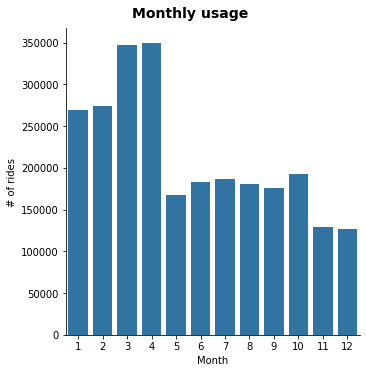

In [69]:
# monthly usage

g = sns.catplot(data=df_clean, x='start_time_month', kind='count', color = sns.color_palette()[0] )
g.set_axis_labels("Month", "# of rides")
g.fig.suptitle('Monthly usage', y=1.03, fontsize=14, fontweight='semibold');

From the above analysis we can clearly noticed that usage was high during first quater and in the month of April and then there is a sudden downfall in usage. This may be due to the climatic conditions.  

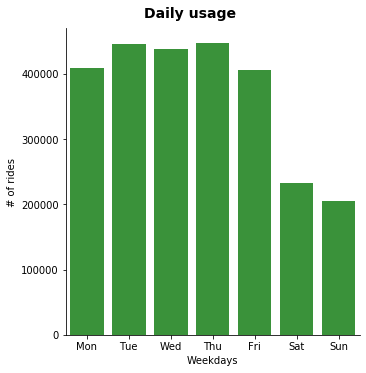

In [73]:
# daily usage

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df_clean, x='start_time_day', kind='count', color = sns.color_palette()[2], order = days)
g.set_axis_labels("Weekdays", "# of rides")
g.fig.suptitle('Daily usage', y=1.03, fontsize=14, fontweight='semibold');

From the above analysis we can clearly see that people tend to rent a bike on the weekdays and on weekends user's prefer private means. 

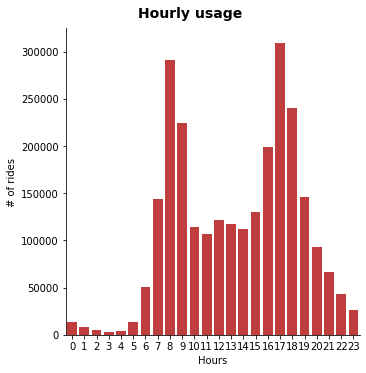

In [74]:
# hourly usage

g = sns.catplot(data=df_clean, x='start_time_hour', kind='count', color = sns.color_palette()[3])
g.set_axis_labels("Hours", "# of rides")
g.fig.suptitle('Hourly usage', y=1.03, fontsize=14, fontweight='semibold');

Users' mainly rent a bike during the office hours to commute, 7-9am to 4-6pm are rush hours.

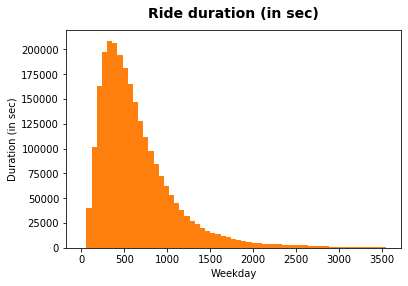

In [76]:
# proportion duration (sec)

bin_edges = np.arange(0, 3600,60)

plt.hist(data = df_clean, x = 'duration_sec', bins = bin_edges, color = sns.color_palette()[1])

plt.title("Ride duration (in sec)", y=1.03, fontsize=14, fontweight='semibold')
plt.xlabel('Weekday')
plt.ylabel('Duration (in sec)');

In [77]:
df_clean.duration_sec.describe()

count    2.583000e+06
mean     7.679708e+02
std      1.910007e+03
min      6.100000e+01
25%      3.410000e+02
50%      5.390000e+02
75%      8.370000e+02
max      8.628100e+04
Name: duration_sec, dtype: float64

The average trip is just under 12.7 minutes, with 75% of trips being under 14 minutes. Observing the histogram, most rides are between the 3 - 11 minute range. Thus it means that rides are booked for short distances.

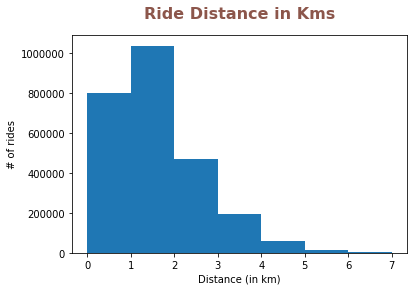

In [79]:
# Ride distance (in km)
bin_edges = np.arange(0, 8, 1)

plt.hist(data = df_clean, x = 'ride_distance', bins = bin_edges);

plt.title("Ride Distance in Kms", y=1.05, fontsize=16, fontweight='bold', color = sns.color_palette()[5])
plt.xlabel('Distance (in km)')
plt.ylabel('# of rides');

In [80]:
df_clean.ride_distance.describe()

count    2.583000e+06
mean     1.727871e+00
std      3.471370e+01
min      0.000000e+00
25%      8.852018e-01
50%      1.400244e+00
75%      2.140739e+00
max      1.279835e+04
Name: ride_distance, dtype: float64

From the above observation we can see that bikes are booked for short distances with average distance of 1.7 kms and 75% of the users go around 2.2 kms.

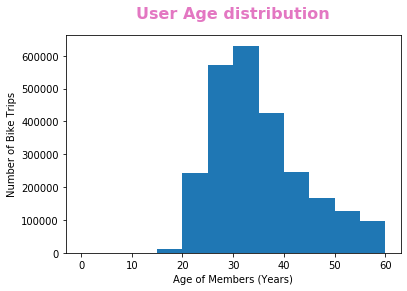

In [82]:
# Age group distribution

bin_edges = np.arange(0, 65, 5)

plt.hist(data = df_clean, x = 'member_age', bins = bin_edges);

plt.title("User Age distribution", y=1.05, fontsize=16, fontweight='bold', color = sns.color_palette()[6])
plt.xlabel('Age of Members (Years)')
plt.ylabel('Number of Bike Trips');

In [83]:
df_clean.member_age.describe()

count    2.583000e+06
mean     3.538395e+01
std      1.035014e+01
min      1.800000e+01
25%      2.800000e+01
50%      3.300000e+01
75%      4.000000e+01
max      1.410000e+02
Name: member_age, dtype: float64

We can see that the average user's age is 35 and generally 75% of the users are under 40 years of age.

#### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Unusal points came for the duration, where sometimes the value was more than 24 hours. So i had to set the histogram accordingly, max range to 3600 sec = 60 min.

#### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


Unusal distribution occured for the member birth year, in which some values were dated before 1900. Since 95% of the members were between 18 and 56 years, I removed users older than 60.

### Bivariate Exploration

In [84]:
# distribution of user types

customer = df_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_clean.query('user_type == "Subscriber"')['bike_id'].count()

customer_distribution = customer / df_clean['bike_id'].count()
subscriber_distribution = subscriber / df_clean['bike_id'].count()

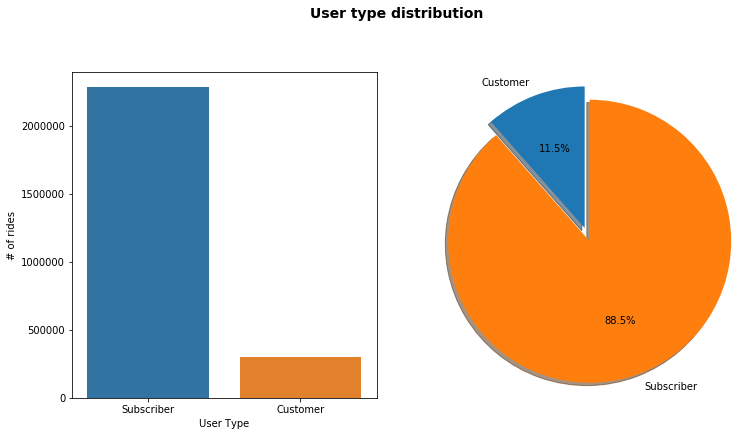

In [88]:
plt.figure(figsize = [12, 6])

# bar chart
plt.subplot(1, 2, 1)

g = sns.countplot(data=df_clean, x="user_type", order=df_clean.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('# of rides')

# pie chart
plt.subplot(1, 2, 2)

labels = ['Customer', 'Subscriber']
sizes = [customer_distribution, subscriber_distribution]
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('User type distribution', y=1.03, fontsize=14, fontweight='semibold');

The bike sharing system is mainly used by subscribers with 88% proportion and than ocassional, customer with 12%.


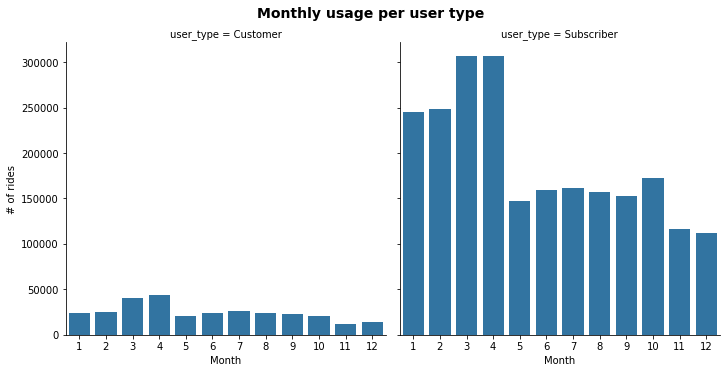

In [90]:
# monthly usage per user type

g = sns.catplot(data=df_clean, x='start_time_month',col = 'user_type', kind='count', color = sns.color_palette()[0] )
g.set_axis_labels("Month", "# of rides")
g.fig.suptitle('Monthly usage per user type', y=1.03, fontsize=14, fontweight='semibold');

The trend is similar for both customer and subscriber first quater and april has high usage.

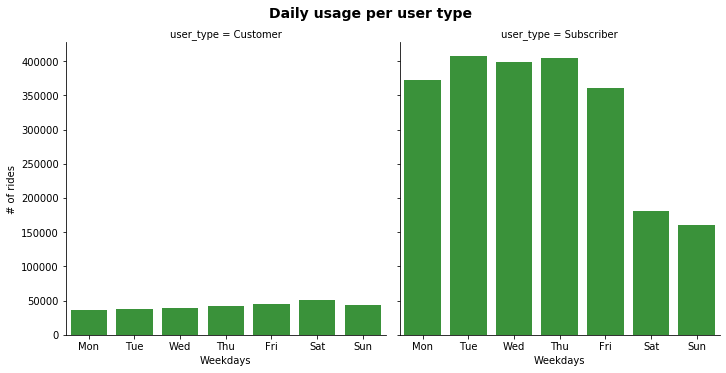

In [91]:
# daily usage per user type

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df_clean, x='start_time_day',col = 'user_type', kind='count', color = sns.color_palette()[2], order = days)
g.set_axis_labels("Weekdays", "# of rides")
g.fig.suptitle('Daily usage per user type', y=1.03, fontsize=14, fontweight='semibold');

For subscriber we can see the trend with weekdays whereas for customers its almost same for each day.

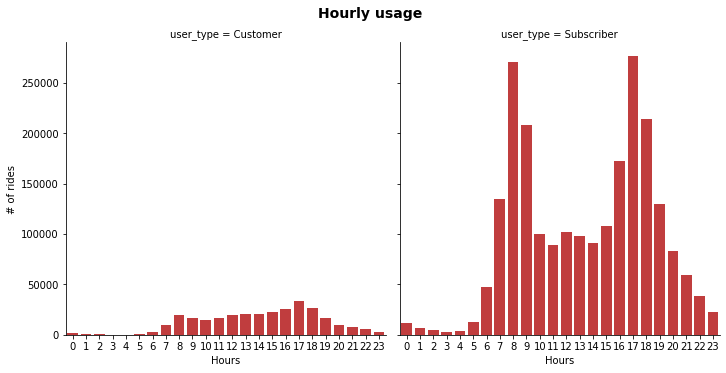

In [99]:
# hourly usage per user type

g = sns.catplot(data=df_clean, x='start_time_hour',col = 'user_type', kind='count', color = sns.color_palette()[3])
g.set_axis_labels("Hours", "# of rides")
g.fig.suptitle('Hourly usage', y=1.03, fontsize=14, fontweight='semibold');

Both customer and subscriber has high usage during office hours.

c:\users\nilad\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


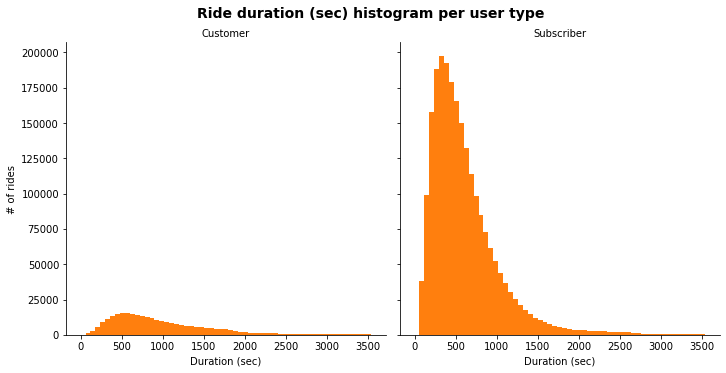

In [100]:
#duration (sec) distribution per user type

g = sns.FacetGrid(df_clean, col="user_type", margin_titles=True, size=5)
bin_edges = np.arange(0, 3600,60)
g.map(plt.hist, "duration_sec", color=sns.color_palette()[1], bins=bin_edges)
g.set_axis_labels("Duration (sec)", "# of rides")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Ride duration (sec) histogram per user type', y=1.03, fontsize=14, fontweight='semibold');

We can observe that trip durations are longer for customers around 8 to 23 minutes than for subscribers 7 to 12 minutes.

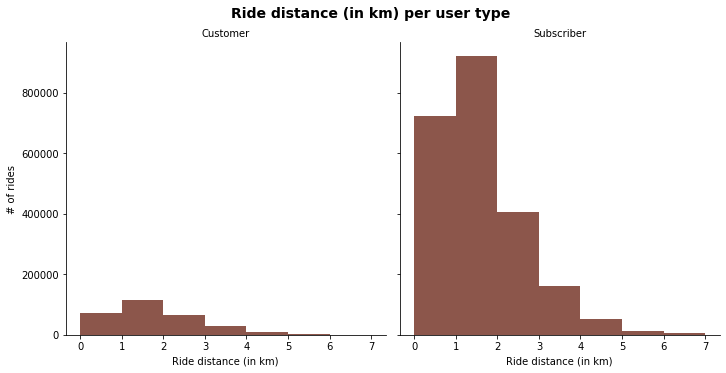

In [101]:
#ride distance (in km) distribution per user type

g = sns.FacetGrid(df_clean, col="user_type", margin_titles=True, size=5)
bin_edges = np.arange(0, 8, 1)
g.map(plt.hist, "ride_distance", color=sns.color_palette()[5], bins=bin_edges)
g.set_axis_labels("Ride distance (in km)", "# of rides")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Ride distance (in km) per user type', y=1.03, fontsize=14, fontweight='semibold');

Both customer and subscriber travel for short distances, the number of rides of subscribers are much greater than customers. 

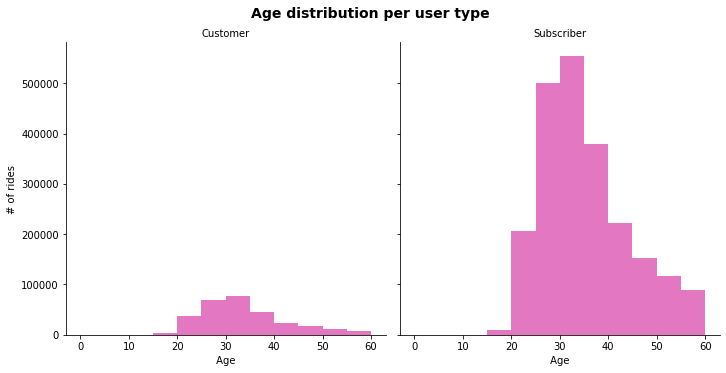

In [102]:
#age group distribution per user type

g = sns.FacetGrid(df_clean, col="user_type", margin_titles=True, size=5)
bin_edges = np.arange(0, 65, 5)
g.map(plt.hist, "member_age", color=sns.color_palette()[6], bins=bin_edges)
g.set_axis_labels(" Age ", "# of rides")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Age distribution per user type', y=1.03, fontsize=14, fontweight='semibold');

The age distribution is same for both customer and subscriber with 18 to 40 years group users rent more.

#### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?


Grouping the data in user type provided much more insigh of the data. People who rent bike are generally casual riders like tourists, or students residing nearby and is mainly rented during first quater and april month. Customers tend to increase during weekends. Bikes are mainly rented during 7-9 am and 5-7pm to commute to office or educational institute.

#### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Subscribers most frequently rent, around 7-9am and 4-6pm. Customers rent at weekend around 10am-5pm and weekday 5-6pm. Customers rent during weekend for casual purpose.

### Multivariate Exploration

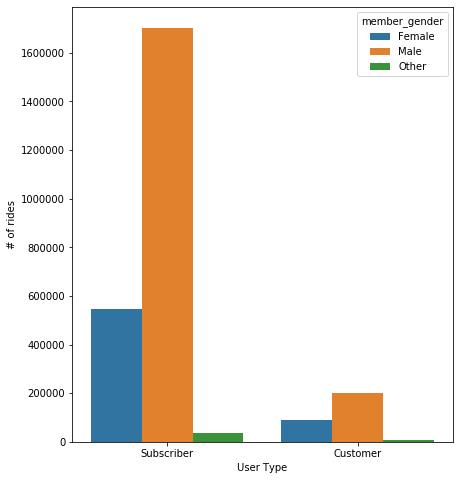

In [125]:
# no of bike trips vs user type with category filters as gender

plt.figure(figsize = [15, 8])

plt.subplot(1, 2, 1)

g = sns.countplot(data=df_clean, x="user_type", hue="member_gender", order=df_clean.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('# of rides');

Male in subscriber user type tend to have more rides than the male in customer, female and other have few rides. We can predict that customers are mainly casual visiters.

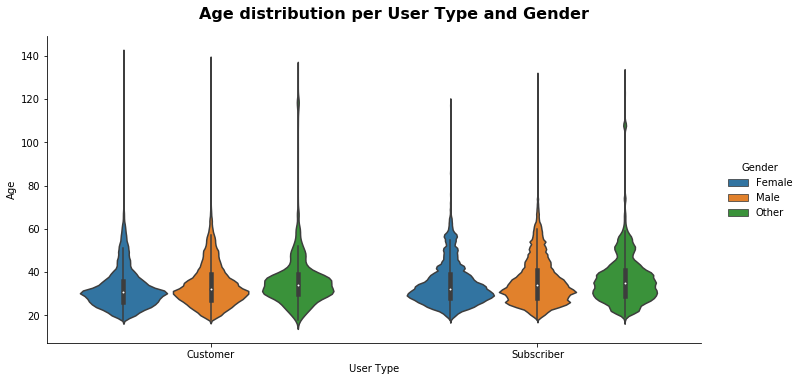

In [121]:
#age distribution per user type and gender

graph = sns.catplot(data=df_clean, x='user_type', y="member_age", hue="member_gender", kind="violin", height=5, aspect=2);

graph.set_axis_labels("User Type", "Age")
graph._legend.set_title('Gender')
graph.fig.suptitle('Age distribution per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');

Its good to see that all genders have equal age distribution also for user types. But subscribers also have slighly aged persons 40 to 50 years age which is very encouraging. 

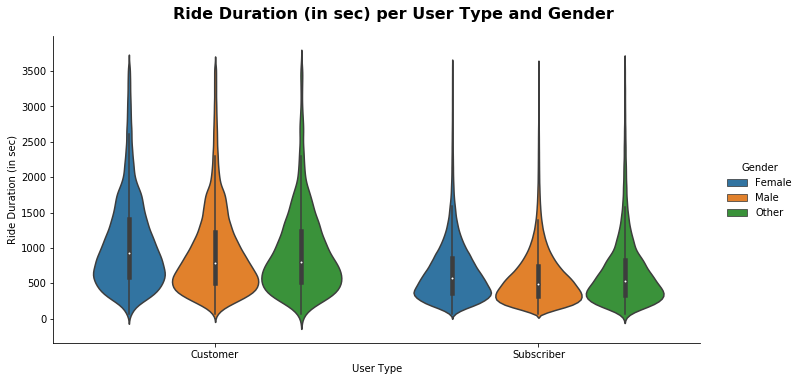

In [120]:
#ride duration per user type and gender

graph = sns.catplot(data=df_clean.query('duration_sec < 3600'), x='user_type', y="duration_sec", hue="member_gender", kind="violin", height=5, aspect=2);

graph.set_axis_labels("User Type", "Ride Duration (in sec)")
graph._legend.set_title('Gender')
graph.fig.suptitle('Ride Duration (in sec) per User Type and Gender', y=1.05, fontsize=16, fontweight='bold');

Subscriber tend to have less ride hour as they mainly commute to office or educational institute, so they have a fixed distance. While customers have rather more ride durations as compared to customers beacuse they are mainly tourists or casual travellers.

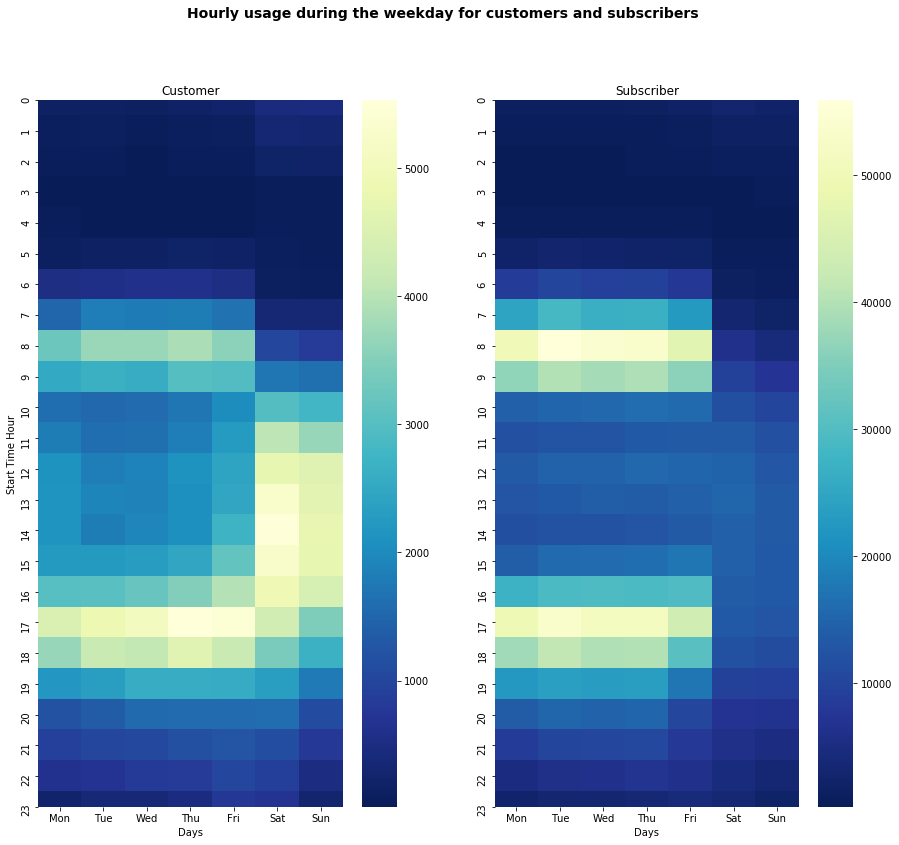

In [126]:
# weekday order

df_clean['start_time_day'] = pd.Categorical(df_clean['start_time_day'],categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(15,13))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', fontsize=14, fontweight='semibold')

# heatmap for customers
plt.subplot(1, 2, 1)
df_customer = df_clean.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_day"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_day", "bike_id")
sns.heatmap(df_customer, cmap='YlGnBu_r')

plt.title("Customer", y=1.015)
plt.xlabel('Days')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_clean.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_day"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_day", "bike_id")
sns.heatmap(df_subscriber, cmap='YlGnBu_r')

plt.title("Subscriber", y=1.015)
plt.xlabel('Days')
plt.ylabel('');

Customers rent more often on weekends, while Subscribers primarily use the bikes on weekdays.


#### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Customers: During weekdays, most bike rides occur between 4-6pm, peaking on Fridays around 5pm. During weekends, most bike rides occur between 11am and 6pm, peaking on Saturdays around 2pm.

Subscribers: During weekdays, most bike rides occur around 8-9am and 4-6pm.

#### Were there any interesting or surprising interactions between features?

It was interesting and also surprising to see 40-50 years old group active. 

#### Sources
    1. FordGoBike Data Set
    2. Haversine formula used to calculate distances using latitude and longitude
    3. Stackoverflow
    4. Google